# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your Boston Housing data model using train-test split.


## Objectives

You will be able to:

- Compare training and testing errors to determine if model is over or underfitting


## Let's use our Boston Housing Data again!

This time, let's only include the variables that were previously selected using recursive feature elimination. We included the code to preprocess below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
b = boston_features['B']
logdis = np.log(boston_features['DIS'])
loglstat = np.log(boston_features['LSTAT'])

# Min-Max scaling
boston_features['B'] = (b-min(b))/(max(b)-min(b))
boston_features['DIS'] = (logdis-min(logdis))/(max(logdis)-min(logdis))

# Standardization
boston_features['LSTAT'] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))

In [2]:
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
X['MEDV'] = boston.target
# y = pd.DataFrame(boston.target, columns = ['target'])

/home/ben/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Perform a train-test split

In [56]:
# Split the data into training and test sets. Use the default split size
from sklearn.model_selection import train_test_split
train, test = train_test_split(X, test_size=0.25)

### Apply your model to the train set

In [57]:
# Importing and initialize the linear regression model class
from sklearn.linear_model import LinearRegression

In [58]:
# Fit the model to train data
linreg_train = LinearRegression()
linreg_train.fit(train.iloc[:, :-1], train.MEDV)

linreg_test = LinearRegression()
linreg_test.fit(test.iloc[:, :-1], test.MEDV)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Calculate predictions on training and test sets

In [59]:
# Calculate predictions on training and test sets
test_y_hat = linreg_test.predict(test.iloc[:, :-1])
train_y_hat = linreg_train.predict(train.iloc[:, :-1])

### Calculate training and test residuals

In [60]:
# Calculate residuals
train_y_hat_resids = train.MEDV - train_y_hat
test_y_hat_resids = test.MEDV - test_y_hat

### Calculate the Mean Squared Error (MSE)

A good way to compare overall performance is to compare the mean squarred error for the predicted values on the training and test sets.

In [61]:
# Import mean_squared_error from sklearn.metrics
from sklearn.metrics import mean_squared_error

In [62]:
# Calculate training and test MSE
train_mse = mean_squared_error(train.MEDV, train_y_hat)
test_mse = mean_squared_error(test.MEDV, test_y_hat)
print(train_mse)
print(test_mse)

20.129757698069568
23.083966994256755


If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluate the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

In [14]:
def model():
    t_sizes = list(range(5,100,5))
    train_ys_mean = []
    test_ys_mean = []
    for t_size in t_sizes:
        train_ys = []
        test_ys = []
        for i in range(100):
            train, test = train_test_split(X, test_size=t_size/100)

            linreg = LinearRegression()
            linreg.fit(train.iloc[:, :-1], train.MEDV)

            test_y_hat = linreg.predict(test.iloc[:, :-1])
            train_y_hat = linreg.predict(train.iloc[:, :-1])

            train_mse = mean_squared_error(train.MEDV, train_y_hat)
            test_mse = mean_squared_error(test.MEDV, test_y_hat)
            
            train_ys.append(train_mse)
            test_ys.append(test_mse)
        test_ys_mean.append(np.mean(test_ys))
        train_ys_mean.append(np.mean(train_ys))
    plt.scatter(t_sizes, test_ys_mean, label='Testing Error')
    plt.scatter(t_sizes, train_ys_mean, label='Training Error')
    plt.legend()

# Evaluate the effect of train-test split size: Extension

Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

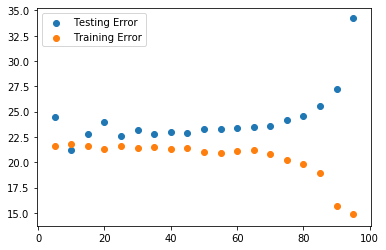

In [15]:
model()

What's happening here? Evaluate your result!

As test size increases the testing error increases and training error decreases.

##  Summary 

Congratulations! You now practiced your knowledge of MSE and used your train-test split skills to validate your model.